# Регрессия на реальном наборе данных

## Данные

В качестве данных будем использовать следующий датасет: [Automobile Dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)

### Описание данных

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

## Загрузка и предобработка

In [ ]:
import pandas as pd
auto = pd.read_csv('automobiles.csv', na_values=['?'])
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Для начала имеет смысл разобраться с пропусками и понять, а сколько в принципе этих пропусков?

In [ ]:
auto.isna().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Сначала выбросим те строки, в которых пропущена целевая переменная

In [ ]:
drop_idx = auto[auto.price.isna()].index
drop_idx

Index([9, 44, 45, 129], dtype='int64')

In [ ]:
auto = auto.drop(index=drop_idx, axis=1)
auto.isna().sum()

,0
symboling,0
normalized-losses,37
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
auto.dtypes

,0
symboling,int64
normalized-losses,float64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


Продолжим работать с пропусками. Перед нами признаки абсолютно разной природы.

*   `normalized-losses`, `bore`, `stroke`, `horsepower`, `peak-rpm` — непрерывные переменные
*   `num-of-doors` — вряд ли

Будем как-то заполнять пропуски в данных. Ясно, что заполнять нужно по-разному. Для этого отделим непрерывные и категориальные признаки, создав маску:

In [ ]:
cat_mask = (auto.dtypes.values==object)
cat_mask

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False])

In [ ]:
X_cat = auto[auto.columns[cat_mask]]
X_noncat = auto[auto.columns[~cat_mask]]

Заполним пропуски следующим образом. В числовых данных пропуски заполним средним, в категориальных — пустотой.

In [ ]:
from sklearn.impute import SimpleImputer

Сначала заполним пропуски в непрерывных признаках средним:

In [ ]:
mis_replacer = SimpleImputer(strategy='mean')
X_noncat = pd.DataFrame(mis_replacer.fit_transform(X_noncat), columns=X_noncat.columns)

Теперь заполним пропуски в категориальных признаках пустой строкой:

In [ ]:
cat_replacer = SimpleImputer(strategy='constant', fill_value='')
X_cat = pd.DataFrame(cat_replacer.fit_transform(X_cat), columns=X_cat.columns)

Объединим наборы данных, проверим, что пропуски заполнены

In [ ]:
X_clean = pd.concat([X_cat, X_noncat], axis=1)
X_clean.isna().sum()

,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
engine-type,0
num-of-cylinders,0
fuel-system,0


**Всегда нужно осознавать, случайны ли пропуски в каком-то признаке.** Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

**Пример:** предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков **рекомендуется создавать отдельную категорию**, соответствующую пропущенному значению.

Будем предсказывать цену. Отделим ее в отдельный набор данных

## Базовая модель

Попробуем в качестве самого первого приближения обучить модель только на числовых признаках без каких-либо преобразований. Впоследствии будем использовать этот результат как бейслайн.

In [ ]:
from sklearn.model_selection import train_test_split
cat_mask = (X_clean.dtypes.values==object)
auto_base = X_clean[X_clean.columns[~cat_mask]]
X_train, X_test, y_train, y_test = train_test_split(auto_base.drop(['price'], axis=1), auto_base['price'], test_size=0.2, random_state=42)
X_train

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
38,0.0,85.0,96.5,175.4,65.2,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
24,1.0,148.0,93.7,157.3,63.8,50.6,1989.0,90.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0
122,3.0,186.0,94.5,168.9,68.3,50.2,2778.0,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,122.0,114.2,198.9,68.4,58.7,3230.0,120.0,3.46,3.19,8.4,97.0,5000.0,19.0,24.0
14,0.0,122.0,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0
92,1.0,128.0,94.5,165.6,63.8,53.3,2028.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
179,2.0,122.0,97.3,171.7,65.5,55.7,2209.0,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

base_reg = LinearRegression().fit(X_train, y_train)
print('R^2 score: ', r2_score(y_test, base_reg.predict(X_test)))
print('MAE score: ', mean_absolute_error(y_test, base_reg.predict(X_test)))

R^2 score:  0.7900762326362628
MAE score:  3501.6064561200124


## Масштабирование признаков

### Масштабирование числовых признаков

В ходе предобработки данных часто рекомендуется приводить все признаки к одному масштабу. Это важно по нескольким причинам:

*   ускорение обучения модели;
*   улучшение численной устойчивости при работе с матрицей объекты-признаки;
*   для линейных моделей: интерпретация весов при признаках как меры их значимости ([полезная ссылка](https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0)).

Первый популярный способ масштабирования — нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в `sklearn`). Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в `sklearn`).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

scaled_reg = LinearRegression().fit(X_train_scaled, y_train)
print('R^2 score: ', r2_score(y_test, scaled_reg.predict(X_test_scaled)))
print('MAE score: ', mean_absolute_error(y_test, scaled_reg.predict(X_test_scaled)))

R^2 score:  0.7900762326362646
MAE score:  3501.6064561199983


## Линеаризация признаков

Особенно важным моментом для линейной регрессии является нелинейное преобразование признаков. Это позволяет использовать линейную регрессию для моделирования нелинейных зависимостей. Из популярных преобразований можно выделить следующие: полиномиальные признаки (`PolynomialFeatures` в `sklearn`), взятие логарифма, квадратного корня, применение тригонометрических функий.

Например, в нашем датасете зависимость целевой переменной от признака `curb-weight` скорее квадратичная, чем линейная:

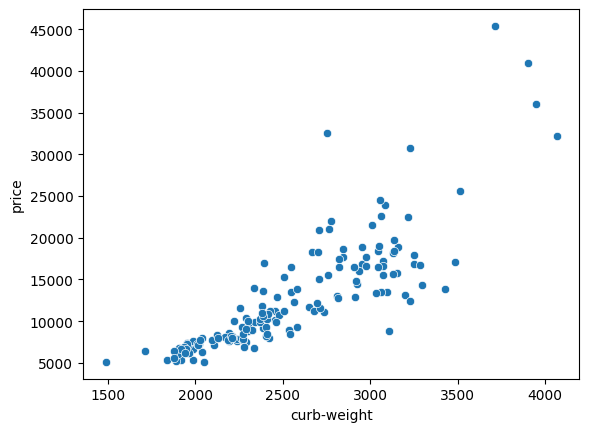

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.scatterplot(x=X_train['curb-weight'], y=y_train)
plt.xlabel('curb-weight')
plt.ylabel('price')
plt.show(fig)

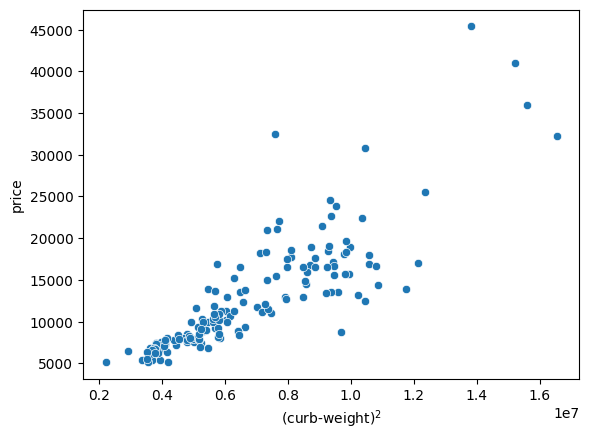

In [ ]:
#fig = sns.scatterplot(x=X_train_scaled['curb-weight'] ** 2, y=y_train)
fig = sns.scatterplot(x=X_train['curb-weight'] ** 2, y=y_train)
plt.xlabel('(curb-weight)$^2$')
plt.ylabel('price')
plt.show(fig)

In [ ]:
#sns.pairplot(pd.concat([X_train, y_train], axis=1))

Похоже, зависимость price от city-mpg, highway-mpg скорее имеет вид $\dfrac{1}{\sqrt{⋅}}$

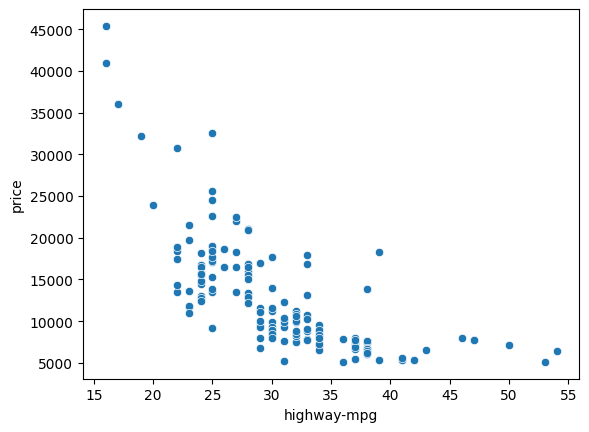

In [ ]:
fig = sns.scatterplot(x=X_train['highway-mpg'], y=y_train)
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show(fig)

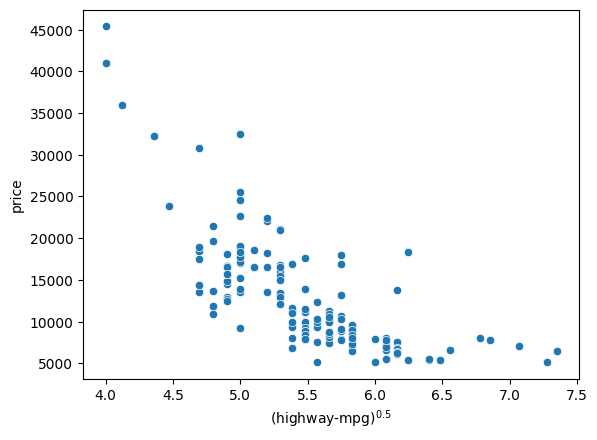

In [ ]:
fig = sns.scatterplot(x=X_train['highway-mpg'] ** 0.5, y=y_train)
plt.xlabel('(highway-mpg)$^{0.5}$')
plt.ylabel('price')
plt.show(fig)

In [ ]:
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()
X_train_poly['city-mpg'] = X_train_poly['city-mpg'] ** 0.5
X_train_poly['highway-mpg'] = X_train_poly['highway-mpg'] ** 0.5
X_train_poly['curb-weight'] = X_train_poly['curb-weight'] ** 2
X_test_poly['city-mpg'] = X_test_poly['city-mpg'] ** 0.5
X_test_poly['highway-mpg'] = X_test_poly['highway-mpg'] ** 0.5
X_test_poly['curb-weight'] = X_test_poly['curb-weight'] ** 2

In [ ]:
scaler = MinMaxScaler()
X_train_poly_scaled = pd.DataFrame(scaler.fit_transform(X_train_poly), columns = X_train.columns)
X_test_poly_scaled = pd.DataFrame(scaler.transform(X_test_poly), columns = X_test.columns)

scaled_reg = LinearRegression().fit(X_train_poly_scaled, y_train)
print('R^2 score: ', r2_score(y_test, scaled_reg.predict(X_test_poly_scaled)))
print('MAE score: ', mean_absolute_error(y_test, scaled_reg.predict(X_test_poly_scaled)))

R^2 score:  0.7939572714446392
MAE score:  3477.354760627635


## Обработка НЕчисловых признаков

Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась числовая матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам.

**Пример:** некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

К категориальным признакам, принимающим значения из неупорядоченного конечного множества
$K$, часто применяют one-hot encoding (вместо одного признака создают
$K$ бинарных признаков — по одному на каждое возможное значение исходного признака). Правда, нужно понимать, что создание $K$ таких признаков приведет к мультиколлинеарности, и поэтому в зависимости от применяемой модели может быть стоит убрать один из них (и оставить $K−1$
признак).

В `sklearn` one-hot кодирование можно сделать с помощью класса `OneHotEncoder`, а можно использовать функцию `pd.get_dummies`.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр `OneHotEncoder(sparse=True)` или `.get_dummies(sparse=True)`, и метод вернет разреженную матрицу, в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов `sklearn` умеют работать с разреженными матрицами.

Сделаем `one-hot` для трейна и теста.

In [ ]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X_clean.drop(['price'], axis=1), X_clean['price'], test_size=0.2, random_state=42)
X_train_all = pd.get_dummies(X_train_all, drop_first=True)
X_test_all = pd.get_dummies(X_test_all, drop_first=True)
X_train_all.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
38,0.0,85.0,96.5,175.4,65.2,54.1,2304.0,110.0,3.15,3.58,...,False,False,False,False,False,False,False,False,False,False
24,1.0,148.0,93.7,157.3,63.8,50.6,1989.0,90.0,2.97,3.23,...,False,False,False,True,False,False,False,False,False,False
122,3.0,186.0,94.5,168.9,68.3,50.2,2778.0,151.0,3.94,3.11,...,False,False,False,False,False,False,False,True,False,False
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False


Установим соответствие колонок

In [ ]:
X_test_all = X_test_all.reindex(columns = X_train_all.columns, fill_value=0)
X_test_all.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
95,2.0,168.0,95.1,162.4,63.8,53.3,2008.0,97.0,3.15,3.29,...,0,0,False,True,0,False,0,False,False,0
15,0.0,122.0,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,...,0,0,False,False,0,False,0,True,False,0
30,2.0,137.0,86.6,144.6,63.9,50.8,1819.0,92.0,2.91,3.41,...,0,0,False,False,0,False,0,False,False,0
158,0.0,91.0,95.7,166.3,64.4,52.8,2140.0,98.0,3.19,3.03,...,0,0,False,True,0,False,0,False,False,0
128,3.0,150.0,99.1,186.6,66.5,56.1,2658.0,121.0,3.54,3.07,...,0,0,False,False,0,False,0,True,False,0


Далее по шагам из предыдущего случая: линеаризация, скейлинг, обучение.

In [ ]:
X_train_all['city-mpg'] = X_train_all['city-mpg'] ** 0.5
X_train_all['highway-mpg'] = X_train_all['highway-mpg'] ** 0.5
X_train_all['curb-weight'] = X_train_all['curb-weight'] ** 2
X_test_all['city-mpg'] = X_test_all['city-mpg'] ** 0.5
X_test_all['highway-mpg'] = X_test_all['highway-mpg'] ** 0.5
X_test_all['curb-weight'] = X_test_all['curb-weight'] ** 2

In [ ]:
scaler = MinMaxScaler()
X_train_all_scaled = pd.DataFrame(scaler.fit_transform(X_train_all), columns = X_train_all.columns)
X_test_all_scaled = pd.DataFrame(scaler.transform(X_test_all), columns = X_test_all.columns)

scaled_reg = LinearRegression().fit(X_train_all_scaled, y_train)
print('R^2 score: ', r2_score(y_test, scaled_reg.predict(X_test_all_scaled)))
print('MAE score: ', mean_absolute_error(y_test, scaled_reg.predict(X_test_all_scaled)))

R^2 score:  -1.483729197220484e+22
MAE score:  210417401332520.84


In [ ]:
scaled_reg.coef_

array([-6.14118816e+02, -3.72699276e+02,  5.56753819e+03, -6.70473495e+03,
        6.61640618e+03, -2.77539107e+03,  1.62576282e+04,  7.25745511e+03,
       -2.83817272e+03, -7.89072226e+02, -1.19474612e+04, -3.07853801e+03,
        2.17157674e+03, -6.86882960e+03,  5.72493227e+03,  3.46956306e+03,
        5.79766970e+03, -1.98155091e+03, -2.86915173e+03,  3.94629283e+02,
       -3.98747931e+03,  1.21284799e+03, -5.33890781e+02,  1.66590779e+03,
       -1.60780648e+03, -2.47986931e+03, -6.31908959e+02, -1.80888246e+15,
       -3.03376121e+03,  5.74685290e+03, -1.84835445e+03,  2.84858108e+03,
        3.11783041e+16, -2.02800000e+03, -6.28000000e+02, -5.91953125e+02,
        2.99342216e+16,  1.78500000e+03,  2.47000000e+03,  1.67100000e+03,
       -2.74000000e+03, -3.21200000e+03, -3.05300000e+03, -3.68600000e+03,
        3.47000000e+02,  2.50937500e+03,  3.11783041e+16,  1.80888246e+15,
        2.68000000e+02, -3.11783041e+16, -1.60000000e+03, -1.72541843e+16,
       -1.58500000e+04, -

# Регуляризация

Регуляризации бывают разные
$$
\operatorname{Loss} = \operatorname{MSE} + \lambda \sum\limits_{i} |\theta_i| + \mu \sum\limits_i \theta_i^2
$$
Ridge + LASSO = Elastic Net

In [ ]:
regulariz_reg = Ridge().fit(X_train_all_scaled, y_train)
print('R^2 score: ', r2_score(y_test, regulariz_reg.predict(X_test_all_scaled)))
print('MAE score: ', mean_absolute_error(y_test, regulariz_reg.predict(X_test_all_scaled)))

R^2 score:  0.8585295249279769
MAE score:  2289.9096283772465


In [ ]:
regulariz_reg.coef_

array([ 7.29203972e+02,  2.20596606e+02,  3.16865416e+03,  1.52524047e+03,
        3.91810759e+03, -1.49920806e+02,  4.82288266e+03,  5.74669012e+03,
        1.92807017e+02, -1.39500769e+03,  4.09932029e+00,  3.29104146e+03,
       -4.44157831e+02, -1.49099382e+03, -1.12218958e+03,  1.25440843e+03,
        3.66991671e+03, -3.43244832e+02, -1.16258443e+03,  2.57270111e+02,
       -2.09900324e+03,  3.02639824e+03, -5.61206524e+02,  5.75524725e+03,
       -1.21424854e+03, -1.05631042e+03, -1.60066856e+03, -1.49568766e+03,
       -1.45358934e+03,  4.32284953e+03, -1.46431509e+03,  6.70118501e+02,
       -2.54561411e+03, -2.27173552e+03, -9.35926615e+02, -5.63797141e+02,
       -6.10029736e+02,  1.09518505e+03,  6.16365199e+02,  3.74100412e+01,
        6.11013984e+02, -1.53233198e+03, -1.40876848e+03, -2.25062269e+03,
       -4.99074621e+02,  1.43521679e+03,  3.34610429e+03, -1.42001288e+03,
        3.28187493e+02,  8.00490179e+02,  3.01752998e+02, -8.76412003e+02,
       -2.89319924e+03, -